# Llama 3.2 1B LoRA Fine-tuning - Local Setup

This notebook trains a LoRA (Low-Rank Adaptation) model on Llama 3.2 1B using your local machine.

## Prerequisites

1. **GPU**: NVIDIA GPU with CUDA support (recommended for faster training)
2. **RAM**: At least 8GB of system RAM
3. **Storage**: ~10GB free space for models and data
4. **Hugging Face Account**: For model access

## Setup Instructions

1. **Hugging Face Token**: 
   - Get your token from https://huggingface.co/settings/tokens
   - Set it as environment variable: `set HF_TOKEN=your_token_here` (Windows)
   - Or replace the token directly in the authentication cell

2. **Data File**: 
   - Ensure `combined_human_conversations.csv` is in your Documents folder
   - Or update the file path in the data loading cell

3. **Run cells in order** - the first cell will install all required packages

## What this notebook does

- Fine-tunes Llama 3.2 1B Instruct model using LoRA
- Uses 4-bit quantization to reduce memory usage
- Trains on conversational data in "Human 1/Human 2" format
- Saves the trained adapter for later use

In [74]:
# Local Environment Setup for Llama 3.2 LoRA Training
# Install required packages for local training

import sys
import subprocess

def install_package(package):
    """Install a package using pip"""
    try:
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])
        print(f"✅ {package} installed successfully")
    except subprocess.CalledProcessError as e:
        print(f"❌ Failed to install {package}: {e}")

# Required packages for LoRA training
packages = [
    "transformers[sentencepiece]",
    "accelerate", 
    "peft",
    "bitsandbytes",
    "datasets",
    "trl",
    "torch",
    "pandas",
    "huggingface_hub",
    "python-dotenv",  # For loading .env files
    "flash-attn --no-build-isolation"  # Flash Attention for faster training (optional)
]

print("🔧 Installing required packages for local LoRA training...")
print("This may take a few minutes...")

for package in packages:
    if "flash-attn" in package:
        print("⚡ Installing Flash Attention (may take longer)...")
        try:
            subprocess.check_call([sys.executable, "-m", "pip", "install", "flash-attn", "--no-build-isolation"])
            print("✅ flash-attn installed successfully")
        except subprocess.CalledProcessError:
            print("⚠️ Flash Attention installation failed (optional - training will still work)")
    else:
        install_package(package)

print("\n🎉 Package installation complete!")
print("📝 Don't forget to create a .env file with your HF_TOKEN:")
print("   HF_TOKEN=your_hugging_face_token_here")
print("\n💡 Tips for GPU usage:")
print("   - Ensure CUDA drivers are up to date")
print("   - Close other GPU-intensive applications")
print("   - Monitor GPU memory usage during training")

🔧 Installing required packages for local LoRA training...
This may take a few minutes...
  Using cached sentencepiece-0.2.0.tar.gz (2.6 MB)
  Installing build dependencies: started
  Using cached sentencepiece-0.2.0.tar.gz (2.6 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached protobuf-6.31.1-cp39-abi3-manylinux2014_x86_64.whl.metadata (593 bytes)
Using cached protobuf-6.31.1-cp39-abi3-manylinux2014_x86_64.whl (321 kB)
  Preparing metadata (pyproject.toml): finished with sta

  error: subprocess-exited-with-error
  
  × Building wheel for sentencepiece (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [262 lines of output]
      /tmp/pip-build-env-6nj3qikp/overlay/lib/python3.13/site-packages/setuptools/_distutils/dist.py:289: UserWarning: Unknown distribution option: 'test_suite'
        warnings.warn(msg)
      /tmp/pip-build-env-6nj3qikp/overlay/lib/python3.13/site-packages/setuptools/dist.py:759: SetuptoolsDeprecationWarning: License classifiers are deprecated.
      !!
      
              ********************************************************************************
              Please consider removing the following classifiers in favor of a SPDX license expression:
      
              License :: OSI Approved :: Apache Software License
      
              See https://packaging.python.org/en/latest/guides/writing-pyproject-toml/#license for details.
              ********************************************************************

✅ accelerate installed successfully
✅ peft installed successfully
✅ peft installed successfully
✅ bitsandbytes installed successfully
✅ bitsandbytes installed successfully
✅ datasets installed successfully
✅ datasets installed successfully
✅ trl installed successfully
✅ trl installed successfully
✅ torch installed successfully
✅ torch installed successfully
✅ pandas installed successfully
✅ pandas installed successfully
✅ huggingface_hub installed successfully
✅ huggingface_hub installed successfully
✅ python-dotenv installed successfully
⚡ Installing Flash Attention (may take longer)...
✅ python-dotenv installed successfully
⚡ Installing Flash Attention (may take longer)...
  Using cached flash_attn-2.8.0.post2.tar.gz (7.9 MB)
  Using cached flash_attn-2.8.0.post2.tar.gz (7.9 MB)
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'error'
⚠️ Flash Attention installation failed (option

  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [35 lines of output]
      
      
      torch.__version__  = 2.7.1+cu126
      
      
      <string>:106: UserWarning: flash_attn was requested, but nvcc was not found.  Are you sure your environment has nvcc available?  If you're installing within a container from https://hub.docker.com/r/pytorch/pytorch, only images whose names contain 'devel' will provide nvcc.
      Traceback (most recent call last):
        File "/home/vi/Llama_Training_With_LoRA/.venv/lib64/python3.13/site-packages/pip/_vendor/pyproject_hooks/_in_process/_in_process.py", line 389, in <module>
          main()
          ~~~~^^
        File "/home/vi/Llama_Training_With_LoRA/.venv/lib64/python3.13/site-packages/pip/_vendor/pyproject_hooks/_in_process/_in_process.py", line 373, in main
          json_out["return_val"] = hook(**hook_input["kwargs"])
                                   ~~~

In [75]:
# Local Hugging Face Authentication
# Option 1: Set your token as an environment variable HF_TOKEN
# Option 2: Replace 'YOUR_HF_TOKEN_HERE' with your actual token
# Option 3: Use huggingface_hub.notebook_login() for interactive login

# GPU Detection and Environment Setup
import torch
import os
from dotenv import load_dotenv
from huggingface_hub import login

# Load environment variables from .env file
load_dotenv()

print("🔍 COMPREHENSIVE GPU & CUDA DETECTION")
print("=" * 50)

# 1. Basic PyTorch and CUDA check
print("1️⃣ PyTorch Installation:")
print(f"   PyTorch version: {torch.__version__}")
print(f"   PyTorch file location: {torch.__file__}")

# 2. CUDA Availability Check
print("\n2️⃣ CUDA Availability:")
cuda_available = torch.cuda.is_available()
print(f"   CUDA available: {cuda_available}")

if cuda_available:
    print(f"   CUDA version (PyTorch): {torch.version.cuda}")
    print(f"   cuDNN version: {torch.backends.cudnn.version()}")
    print(f"   cuDNN enabled: {torch.backends.cudnn.enabled}")
    
    # 3. GPU Information
    print("\n3️⃣ GPU Information:")
    gpu_count = torch.cuda.device_count()
    print(f"   GPU count: {gpu_count}")
    
    for i in range(gpu_count):
        props = torch.cuda.get_device_properties(i)
        memory_gb = props.total_memory / (1024**3)
        print(f"   GPU {i}: {props.name}")
        print(f"   Memory: {memory_gb:.1f} GB")
        print(f"   Compute capability: {props.major}.{props.minor}")
    
    # 4. Set up GPU device
    device = torch.device("cuda")
    print(f"\n4️⃣ Selected device: {device}")
    
    # 5. GPU Memory Management
    torch.cuda.empty_cache()
    if hasattr(torch.cuda, 'set_per_process_memory_fraction'):
        torch.cuda.set_per_process_memory_fraction(0.9)
        print("   ✅ GPU memory fraction set to 90%")
    
    # 6. Test GPU functionality
    print("\n5️⃣ GPU Functionality Test:")
    try:
        # Simple tensor operation test
        test_tensor = torch.randn(100, 100).cuda()
        result = torch.matmul(test_tensor, test_tensor.T)
        print("   ✅ GPU tensor operations working correctly")
        
        # Memory info
        allocated = torch.cuda.memory_allocated() / (1024**3)
        reserved = torch.cuda.memory_reserved() / (1024**3)
        print(f"   GPU Memory - Allocated: {allocated:.2f} GB, Reserved: {reserved:.2f} GB")
        
    except Exception as e:
        print(f"   ❌ GPU test failed: {e}")
        device = torch.device("cpu")
        print("   Falling back to CPU")

else:
    print("\n❌ CUDA NOT AVAILABLE!")
    print("Possible reasons:")
    print("   1. PyTorch CPU version installed instead of CUDA version")
    print("   2. NVIDIA drivers not installed or outdated")
    print("   3. CUDA toolkit not installed")
    print("   4. GPU not CUDA-compatible")
    print("\n💡 Solutions:")
    print("   1. Run the PyTorch CUDA installation cell below")
    print("   2. Update NVIDIA drivers")
    print("   3. Restart kernel after installation")
    
    device = torch.device("cpu")
    print(f"\n📍 Using device: {device}")

# Hugging Face Authentication from .env file
print("\n" + "=" * 50)
print("🔐 HUGGING FACE AUTHENTICATION")

hf_token = os.getenv('HF_TOKEN')

if hf_token:
    try:
        login(token=hf_token)
        print("✅ Successfully logged in to Hugging Face")
    except Exception as e:
        print(f"❌ HF login failed: {e}")
else:
    print("❌ No HF_TOKEN found in .env file!")
    print("Please create a .env file in your project directory with:")
    print("HF_TOKEN=your_token_here")

# Global device variable for use in other cells
DEVICE = device
print(f"\n🎯 FINAL SETUP - Training will use: {DEVICE}")
print("=" * 50)

if str(device) == "cpu":
    print("⚠️  WARNING: Training on CPU will be VERY slow!")
    print("   Consider fixing CUDA setup for much faster training")
else:
    print("🚀 Ready for GPU-accelerated training!")

🔍 COMPREHENSIVE GPU & CUDA DETECTION
1️⃣ PyTorch Installation:
   PyTorch version: 2.7.1+cu126
   PyTorch file location: /home/vi/Llama_Training_With_LoRA/.venv/lib64/python3.13/site-packages/torch/__init__.py

2️⃣ CUDA Availability:
   CUDA available: True
   CUDA version (PyTorch): 12.6
   cuDNN version: 90501
   cuDNN enabled: True

3️⃣ GPU Information:
   GPU count: 1
   GPU 0: NVIDIA GeForce RTX 4070 Ti SUPER
   Memory: 15.6 GB
   Compute capability: 8.9

4️⃣ Selected device: cuda
   ✅ GPU memory fraction set to 90%

5️⃣ GPU Functionality Test:
   ✅ GPU tensor operations working correctly
   GPU Memory - Allocated: 5.53 GB, Reserved: 8.45 GB

🔐 HUGGING FACE AUTHENTICATION


Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


✅ Successfully logged in to Hugging Face

🎯 FINAL SETUP - Training will use: cuda
🚀 Ready for GPU-accelerated training!


In [76]:
# 🚀 GPU-Optimized Configuration
print("🎯 GPU OPTIMIZATION SETTINGS")
print("=" * 50)

# Detect GPU and set appropriate parameters
import torch

if torch.cuda.is_available():
    gpu_name = torch.cuda.get_device_name(0)
    total_memory = torch.cuda.get_device_properties(0).total_memory / (1024**3)
    available_memory = total_memory * 0.85  # Use 85% to leave room for system
    
    print(f"🔧 Detected GPU: {gpu_name}")
    print(f"   Total VRAM: {total_memory:.1f} GB")
    print(f"   Available for training: {available_memory:.1f} GB")
    
    # Set optimal parameters based on available memory
    if total_memory >= 16:
        # High-end GPU settings (16GB+ VRAM)
        batch_size = 4
        gradient_accumulation = 4
        max_length = 768
        learning_rate = 2e-4
        lora_r = 32
        lora_alpha = 64
    elif total_memory >= 12:
        # Mid-range GPU settings (12-16GB VRAM) - Conservative for RTX 4070 Ti SUPER
        batch_size = 1
        gradient_accumulation = 16
        max_length = 384
        learning_rate = 2e-4
        lora_r = 16
        lora_alpha = 32
    elif total_memory >= 8:
        # RTX 3060/4060 range settings (8GB VRAM)
        batch_size = 1
        gradient_accumulation = 16
        max_length = 256
        learning_rate = 2e-4
        lora_r = 8
        lora_alpha = 16
    else:
        # Low VRAM settings
        batch_size = 1
        gradient_accumulation = 16
        max_length = 384
        learning_rate = 2e-4
        lora_r = 8
        lora_alpha = 16
else:
    # CPU fallback
    print("⚠️ No GPU detected, using minimal CPU settings")
    batch_size = 1
    gradient_accumulation = 32
    max_length = 256
    learning_rate = 1e-4
    lora_r = 8
    lora_alpha = 16

print(f"✅ Configuration set:")
print(f"   Batch size: {batch_size}")
print(f"   Gradient accumulation: {gradient_accumulation}")
print(f"   Effective batch size: {batch_size * gradient_accumulation}")
print(f"   Max sequence length: {max_length}")
print(f"   Learning rate: {learning_rate}")
print(f"   LoRA rank: {lora_r}, alpha: {lora_alpha}")

print("=" * 50)

🎯 GPU OPTIMIZATION SETTINGS
🔧 Detected GPU: NVIDIA GeForce RTX 4070 Ti SUPER
   Total VRAM: 15.6 GB
   Available for training: 13.2 GB
✅ Configuration set:
   Batch size: 1
   Gradient accumulation: 16
   Effective batch size: 16
   Max sequence length: 384
   Learning rate: 0.0002
   LoRA rank: 16, alpha: 32


In [77]:
import pandas as pd
from datasets import Dataset, DatasetDict

# Local file path - updated for Linux environment
file_path = '/home/vi/Llama_Training_With_LoRA/combined_human_conversations.csv'

# Check if file exists
import os
if not os.path.exists(file_path):
    print(f"❌ File not found: {file_path}")
    print("Please ensure the CSV file is in the correct location or update the file_path variable")
else:
    print(f"✅ Found file: {file_path}")

# Read the CSV file
try:
    df = pd.read_csv(file_path)
    print("✅ Successfully loaded CSV file")
    
    # Display some info to verify
    print(f"\nDataset info:")
    print(f"Shape: {df.shape}")
    print(f"Columns: {list(df.columns)}")
    print(f"\nFirst few rows:")
    print(df.head())
    print(f"\nNumber of unique conversation_ids: {df['conversation_id'].nunique()}")
    print(f"Total rows: {len(df)}")
    
except Exception as e:
    print(f"❌ Error reading CSV file: {e}")
    print("Please check the file format and path")

✅ Found file: /home/vi/Llama_Training_With_LoRA/combined_human_conversations.csv
✅ Successfully loaded CSV file

Dataset info:
Shape: (4854, 4)
Columns: ['conversation_id', 'Question', 'Answer', 'correctAnswer']

First few rows:
  conversation_id                                           Question  \
0       room_1193  hi ~ how are you?? ~ tell me some things ~ I n...   
1       room_1193      i live whith my familly ~ where are you from?   
2       room_9025                                             Hlelo!   
3       room_7750                       HI ~ hello? ~ is anyone here   
4       room_7750             well, im human and i would like my .50   

                                              Answer correctAnswer  
0                                          i am fine           NaN  
1                         i also live with my family           NaN  
2  What is the name of John Coltrane's first albu...           NaN  
3                                                 hi          

In [78]:
# Enhanced conversation processing with proper turn structure
print("📝 Processing conversations with enhanced turn handling...")

processed_new_conversations_by_id = {} 
for index, row in df.iterrows():
    pair_id = str(row['conversation_id']) 
    questions_str = str(row['Question']) if pd.notna(row['Question']) else ""
    answers_str = str(row['Answer']) if pd.notna(row['Answer']) else ""
    
    # Split by ~ and clean each message
    human1_utterances = [utt.strip() for utt in questions_str.split('~') if utt.strip()]
    human2_utterances = [utt.strip() for utt in answers_str.split('~') if utt.strip()]
    
    # Build proper turn sequence
    current_turn_text = ""
    
    # Add all Human 1 messages first
    for utt in human1_utterances:
        current_turn_text += f"Human 1: {utt}\n"
    
    # Then add all Human 2 responses
    for utt in human2_utterances:
        current_turn_text += f"Human 2: {utt}\n"
    
    # Accumulate conversation for this ID
    if pair_id not in processed_new_conversations_by_id:
        processed_new_conversations_by_id[pair_id] = ""
    processed_new_conversations_by_id[pair_id] += current_turn_text

# Create properly formatted conversations for training
new_formatted_conversations_list = []
for conv_id, conversation_body_text in processed_new_conversations_by_id.items():
    if conversation_body_text.strip():
        # Add proper beginning of text token for Llama training
        full_conversation_string = f"<|begin_of_text|>{conversation_body_text.strip()}"
        new_formatted_conversations_list.append({
            "text": full_conversation_string,
            "conversation_id": conv_id
        })

combined_dataset = Dataset.from_list(new_formatted_conversations_list)
print(f"✅ Processed {len(combined_dataset)} conversations from the dataset.")

# Show example of processed data
if combined_dataset: 
    print(f"\n📄 Example conversation format:")
    example_text = combined_dataset[0]['text']
    print(f"{example_text[:300]}...")
    
    # Show statistics
    avg_length = sum(len(item['text']) for item in combined_dataset) / len(combined_dataset)
    print(f"\n📊 Dataset Statistics:")
    print(f"   Total conversations: {len(combined_dataset)}")
    print(f"   Average conversation length: {avg_length:.0f} characters")
    
    # Count turns
    total_human1_turns = sum(item['text'].count('Human 1:') for item in combined_dataset)
    total_human2_turns = sum(item['text'].count('Human 2:') for item in combined_dataset)
    print(f"   Total Human 1 turns: {total_human1_turns}")
    print(f"   Total Human 2 turns: {total_human2_turns}")
    print(f"   Average turns per conversation: {(total_human1_turns + total_human2_turns) / len(combined_dataset):.1f}")

print("✅ Dataset processing complete!")

📝 Processing conversations with enhanced turn handling...
✅ Processed 776 conversations from the dataset.

📄 Example conversation format:
<|begin_of_text|>Human 1: hi
Human 1: how are you??
Human 1: tell me some things
Human 1: I need to know some thing  abouth you
Human 1: Plase give me some information abouth AI
Human 1: How was the day?
Human 2: i am fine
Human 1: i live whith my familly
Human 1: where are you from?
Human 2: i also...

📊 Dataset Statistics:
   Total conversations: 776
   Average conversation length: 553 characters
   Total Human 1 turns: 5955
   Total Human 2 turns: 6032
   Average turns per conversation: 15.4
✅ Dataset processing complete!


In [80]:
# 📊 Dataset Quality Analysis for Human Training

print("🔍 Analyzing Dataset Quality for Human-like Training")
print("=" * 60)

# Analyze conversation patterns
print("📋 Conversation Analysis:")

# Sample some conversations to check quality
print("\n🔬 Sample Conversations:")
for i in range(min(3, len(combined_dataset))):
    sample = combined_dataset[i]['text'].replace('<|begin_of_text|>', '').strip()
    print(f"\nSample {i+1}:")
    print("-" * 40)
    # Show first 200 chars of conversation
    print(sample[:200] + "..." if len(sample) > 200 else sample)

# Check for AI-related content that might interfere with human training
print(f"\n🤖 Checking for AI/Assistant Content:")
ai_keywords = ['assistant', 'ai', 'artificial intelligence', 'language model', 'chatbot', 'bot']
ai_content_found = []

for keyword in ai_keywords:
    count = 0
    for item in combined_dataset:
        if keyword.lower() in item['text'].lower():
            count += 1
    if count > 0:
        ai_content_found.append(f"'{keyword}': {count} conversations")

if ai_content_found:
    print("   ⚠️  Found AI-related content:")
    for item in ai_content_found:
        print(f"     - {item}")
    print("   💡 This might interfere with human-like training")
else:
    print("   ✅ No obvious AI-related content found - good for human training!")

# Check conversation length distribution
lengths = [len(item['text']) for item in combined_dataset]
avg_length = sum(lengths) / len(lengths)
min_length = min(lengths)
max_length = max(lengths)

print(f"\n📏 Conversation Length Analysis:")
print(f"   Average length: {avg_length:.0f} characters")
print(f"   Shortest: {min_length} characters")
print(f"   Longest: {max_length} characters")

# Categorize by length
short_convs = sum(1 for l in lengths if l < 100)
medium_convs = sum(1 for l in lengths if 100 <= l < 500)
long_convs = sum(1 for l in lengths if l >= 500)

print(f"   Short (<100 chars): {short_convs} ({short_convs/len(lengths)*100:.1f}%)")
print(f"   Medium (100-500 chars): {medium_convs} ({medium_convs/len(lengths)*100:.1f}%)")
print(f"   Long (500+ chars): {long_convs} ({long_convs/len(lengths)*100:.1f}%)")

# Check turn balance
total_human1 = sum(item['text'].count('Human 1:') for item in combined_dataset)
total_human2 = sum(item['text'].count('Human 2:') for item in combined_dataset)

print(f"\n💬 Turn Balance Analysis:")
print(f"   Total Human 1 turns: {total_human1}")
print(f"   Total Human 2 turns: {total_human2}")
print(f"   Balance ratio: {total_human2/total_human1:.2f}")

if total_human2/total_human1 > 0.8:
    print("   ✅ Good turn balance for training Human 2 responses")
else:
    print("   ⚠️  Imbalanced turns - Human 2 has fewer responses")

# Quality indicators
print(f"\n✨ Training Quality Indicators:")
print(f"   ✅ Dataset size: {len(combined_dataset)} conversations")
print(f"   ✅ Proper format: Human 1/Human 2 structure")
print(f"   ✅ BOS tokens: <|begin_of_text|> added")

if avg_length > 50:
    print(f"   ✅ Good conversation length: {avg_length:.0f} chars average")
else:
    print(f"   ⚠️  Short conversations: {avg_length:.0f} chars average")

print(f"\n🎯 Ready for human-like training!")
print("=" * 60)

🔍 Analyzing Dataset Quality for Human-like Training
📋 Conversation Analysis:

🔬 Sample Conversations:

Sample 1:
----------------------------------------
Human 1: hi
Human 1: how are you??
Human 1: tell me some things
Human 1: I need to know some thing  abouth you
Human 1: Plase give me some information abouth AI
Human 1: How was the day?
Human 2: i am...

Sample 2:
----------------------------------------
Human 1: Hlelo!
Human 2: What is the name of John Coltrane's first album
Human 2: hello

Sample 3:
----------------------------------------
Human 1: HI
Human 1: hello?
Human 1: is anyone here
Human 2: hi
Human 1: well, im human and i would like my .50
Human 2: okey i also
Human 1: is that proof enough?
Human 1: also i hate elon musk
Human...

🤖 Checking for AI/Assistant Content:
   ⚠️  Found AI-related content:
     - 'assistant': 2 conversations
     - 'ai': 253 conversations
     - 'artificial intelligence': 1 conversations
     - 'chatbot': 1 conversations
     - 'bot': 90 convers

In [81]:
from datasets import DatasetDict
train_test_split = combined_dataset.train_test_split(test_size=0.1, seed=42) # Use combined_dataset
dataset_dict = DatasetDict({
    'train': train_test_split['train'],
    'eval': train_test_split['test']
})
print("\nCombined Dataset structure for SFTTrainer:")
print(dataset_dict)
print(f"\nTotal Training examples: {len(dataset_dict['train'])}")
print(f"Total Evaluation examples: {len(dataset_dict['eval'])}")


Combined Dataset structure for SFTTrainer:
DatasetDict({
    train: Dataset({
        features: ['text', 'conversation_id'],
        num_rows: 698
    })
    eval: Dataset({
        features: ['text', 'conversation_id'],
        num_rows: 78
    })
})

Total Training examples: 698
Total Evaluation examples: 78


In [82]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig

model_id = "meta-llama/Llama-3.2-1B-Instruct" # Using the Instruct version!

print(f"🤖 Loading tokenizer for {model_id}...")
tokenizer = AutoTokenizer.from_pretrained(
    model_id, 
    trust_remote_code=True,
    use_fast=True,  # Use fast tokenizer for better performance
)

# Set pad token if not set. For Llama 3, it's common to use eos_token as pad_token.
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token
    print("✅ Set pad_token to eos_token")

# Llama 3 Instruct models have a chat template. While we are providing fully formatted
# strings for SFT, the tokenizer itself is aware of roles. For generation, we will
# manually construct the prompt in our "Human 1/Human 2" format.

print("✅ Tokenizer loaded successfully")

🤖 Loading tokenizer for meta-llama/Llama-3.2-1B-Instruct...
✅ Set pad_token to eos_token
✅ Tokenizer loaded successfully
✅ Set pad_token to eos_token
✅ Tokenizer loaded successfully


In [83]:
# Optimized 4-bit Quantization Configuration for GPU
print("⚙️ Configuring 4-bit quantization for GPU optimization...")

# Check if bfloat16 is supported on this GPU
compute_dtype = torch.bfloat16
if not torch.cuda.is_bf16_supported():
    print("⚠️ bfloat16 not supported on this GPU, falling back to float16")
    compute_dtype = torch.float16
else:
    print("✅ Using bfloat16 for optimal performance")

bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",           # Normalized float 4-bit
    bnb_4bit_compute_dtype=compute_dtype,  # Compute dtype based on GPU support
    bnb_4bit_use_double_quant=True,       # Double quantization for memory efficiency
)

print("✅ Quantization config ready")
print(f"   Quantization type: nf4")
print(f"   Compute dtype: {compute_dtype}")
print(f"   Double quantization: True")

⚙️ Configuring 4-bit quantization for GPU optimization...
✅ Using bfloat16 for optimal performance
✅ Quantization config ready
   Quantization type: nf4
   Compute dtype: torch.bfloat16
   Double quantization: True


In [84]:
print("🚀 Loading Llama 3.2-1B with GPU Optimizations...")

# Disable chat template for custom training format
print(f"Original tokenizer chat_template: {tokenizer.chat_template}")
tokenizer.chat_template = None
print(f"Modified tokenizer chat_template: {tokenizer.chat_template}")

# GPU-Optimized model loading
print("📥 Loading model with GPU optimizations...")

# Check if Flash Attention is available
try:
    flash_attn_available = True
    import flash_attn
    print("✅ Flash Attention 2 available - will use for faster training")
except ImportError:
    flash_attn_available = False
    print("⚠️ Flash Attention 2 not available - using standard attention")

model = AutoModelForCausalLM.from_pretrained(
    model_id,
    quantization_config=bnb_config,
    device_map="auto",  # Automatically map to available GPU
    trust_remote_code=True,
    torch_dtype=compute_dtype,
    low_cpu_mem_usage=True,     # Minimize CPU memory during loading
    attn_implementation="flash_attention_2" if flash_attn_available else "sdpa",
    use_cache=False,  # Disable cache for training
    max_memory=None,    # Let auto device mapping handle memory
)

print("✅ Model loaded successfully!")

# Clear any residual memory after model loading
torch.cuda.empty_cache()

# --- CRITICAL: Attach tokenizer to the BASE model ---
model.tokenizer = tokenizer
print("✅ Tokenizer attached to model")

# Pad token configuration
if model.config.pad_token_id is None or model.config.pad_token_id != tokenizer.pad_token_id:
    model.config.pad_token_id = tokenizer.pad_token_id
    print("✅ Pad token ID configured")

# Enable gradient checkpointing for memory efficiency
if hasattr(model, 'gradient_checkpointing_enable'):
    model.gradient_checkpointing_enable()
    print("✅ Gradient checkpointing enabled for memory efficiency")

# Additional memory optimizations
if hasattr(model, 'config'):
    # Enable more aggressive memory optimizations
    model.config.use_cache = False
    if hasattr(model.config, 'pretraining_tp'):
        model.config.pretraining_tp = 1  # Tensor parallelism setting

# Ensure model is in training mode
model.train()

# Display model status
print(f"\n📊 Model Status:")
print(f"   Model dtype: {model.dtype}")
print(f"   Attention implementation: {getattr(model.config, 'attn_implementation', 'default')}")
print(f"   Gradient checkpointing: {getattr(model.config, 'use_gradient_checkpointing', 'enabled')}")

# Memory usage
if torch.cuda.is_available():
    gpu_name = torch.cuda.get_device_name(0)
    torch.cuda.empty_cache()  # Clear any cached memory
    allocated = torch.cuda.memory_allocated()/1024**3
    reserved = torch.cuda.memory_reserved()/1024**3
    total_vram = torch.cuda.get_device_properties(0).total_memory/1024**3
    
    print(f"\n💾 GPU Memory Status ({gpu_name}):")
    print(f"   Total VRAM: {total_vram:.1f} GB")
    print(f"   Allocated: {allocated:.2f} GB ({allocated/total_vram*100:.1f}%)")
    print(f"   Reserved: {reserved:.2f} GB ({reserved/total_vram*100:.1f}%)")
    print(f"   Available: {total_vram-reserved:.1f} GB")
    
    if reserved/total_vram > 0.8:  # Warning if using too much VRAM
        print("   ⚠️ High VRAM usage - consider reducing batch size if training fails")
    else:
        print("   ✅ Good VRAM usage - ready for training")

print("\n🎯 Model ready for LoRA fine-tuning!")

🚀 Loading Llama 3.2-1B with GPU Optimizations...
Original tokenizer chat_template: {{- bos_token }}
{%- if custom_tools is defined %}
    {%- set tools = custom_tools %}
{%- endif %}
{%- if not tools_in_user_message is defined %}
    {%- set tools_in_user_message = true %}
{%- endif %}
{%- if not date_string is defined %}
    {%- if strftime_now is defined %}
        {%- set date_string = strftime_now("%d %b %Y") %}
    {%- else %}
        {%- set date_string = "26 Jul 2024" %}
    {%- endif %}
{%- endif %}
{%- if not tools is defined %}
    {%- set tools = none %}
{%- endif %}

{#- This block extracts the system message, so we can slot it into the right place. #}
{%- if messages[0]['role'] == 'system' %}
    {%- set system_message = messages[0]['content']|trim %}
    {%- set messages = messages[1:] %}
{%- else %}
    {%- set system_message = "" %}
{%- endif %}

{#- System message #}
{{- "<|start_header_id|>system<|end_header_id|>\n\n" }}
{%- if tools is not none %}
    {{- "Environmen

In [85]:
from peft import LoraConfig, get_peft_model, prepare_model_for_kbit_training
import torch
import bitsandbytes as bnb

print("🔧 Preparing model for LoRA training...")

# Prepare model for k-bit training
model = prepare_model_for_kbit_training(model)
print("✅ Model prepared for 4-bit training")

# LoRA Configuration based on GPU memory
print("\n⚙️ Configuring LoRA...")

# Use the optimal config from earlier GPU detection
lora_r = globals().get('lora_r', 16)
lora_alpha = globals().get('lora_alpha', 32)

# Target modules for Llama 3.2
target_modules = [
    "q_proj", "k_proj", "v_proj", "o_proj",  # Attention projections
    "gate_proj", "up_proj", "down_proj"      # MLP layers
]

lora_config = LoraConfig(
    r=lora_r,
    lora_alpha=lora_alpha,
    target_modules=target_modules,
    lora_dropout=0.05,
    bias="none",
    task_type="CAUSAL_LM",
    inference_mode=False,
)

print(f"📊 LoRA Configuration:")
print(f"   Rank (r): {lora_r}")
print(f"   Alpha: {lora_alpha}")
print(f"   Target modules: {target_modules}")
print(f"   Dropout: {lora_config.lora_dropout}")

# Create PEFT model
print(f"\n🔧 Creating PEFT model...")
try:
    peft_model = get_peft_model(model, lora_config)
    print("✅ PEFT model created successfully!")
    
    # Show trainable parameters
    peft_model.print_trainable_parameters()
    
    # Calculate memory usage
    trainable_params = sum(p.numel() for p in peft_model.parameters() if p.requires_grad)
    total_params = sum(p.numel() for p in peft_model.parameters())
    
    print(f"\n📊 Parameter Summary:")
    print(f"   Trainable parameters: {trainable_params:,}")
    print(f"   Total parameters: {total_params:,}")
    print(f"   Trainable ratio: {100 * trainable_params / total_params:.2f}%")
    
    # Memory estimation
    lora_memory = trainable_params * 4 / (1024**3)  # 4 bytes per float32 param
    print(f"   LoRA memory overhead: ~{lora_memory:.2f} GB")
    
    if torch.cuda.is_available():
        allocated = torch.cuda.memory_allocated()/1024**3
        print(f"   Current GPU memory: {allocated:.2f} GB")
        
        total_vram = torch.cuda.get_device_properties(0).total_memory/1024**3
        if allocated/total_vram < 0.4:
            print("   ✅ Excellent memory usage!")
        elif allocated/total_vram < 0.7:
            print("   ✅ Good memory usage")
        else:
            print("   ⚠️ High memory usage - monitor during training")

except Exception as e:
    print(f"❌ Error creating PEFT model: {e}")
    print("Check the target modules and model architecture")
    raise e

print(f"\n🎯 LoRA setup complete!")

🔧 Preparing model for LoRA training...
✅ Model prepared for 4-bit training

⚙️ Configuring LoRA...
📊 LoRA Configuration:
   Rank (r): 16
   Alpha: 32
   Target modules: ['q_proj', 'k_proj', 'v_proj', 'o_proj', 'gate_proj', 'up_proj', 'down_proj']
   Dropout: 0.05

🔧 Creating PEFT model...
✅ PEFT model created successfully!
trainable params: 11,272,192 || all params: 1,247,086,592 || trainable%: 0.9039

📊 Parameter Summary:
   Trainable parameters: 11,272,192
   Total parameters: 760,547,328
   Trainable ratio: 1.48%
   LoRA memory overhead: ~0.04 GB
   Current GPU memory: 7.01 GB
   ✅ Good memory usage

🎯 LoRA setup complete!


In [86]:
from trl import SFTConfig
import os

print("🚀 RTX 4060 Optimized Training Configuration")
print("=" * 50)

# Use optimal settings from RTX 4060 config
batch_size = globals().get('batch_size', 2)
gradient_accumulation = globals().get('gradient_accumulation', 8)
learning_rate = globals().get('learning_rate', 2e-4)
max_length = globals().get('max_length', 512)

output_dir = "./llama3_rtx4060_lora_training"

# RTX 4060 Optimized Training Configuration
sft_config = SFTConfig(
    # Output and logging
    output_dir=output_dir,
    run_name="llama3-1b-lora-rtx4060",
    
    # RTX 4060 Optimized batch settings
    per_device_train_batch_size=batch_size,          # Small batch for 8GB VRAM
    per_device_eval_batch_size=1,                    # Even smaller for eval
    gradient_accumulation_steps=gradient_accumulation, # Effective batch = 2*8 = 16
    
    # Model and sequence settings
    max_seq_length=max_length,                       # Reasonable context length
    
    # Learning settings optimized for human-like conversation training
    learning_rate=learning_rate,                     # Good for LoRA fine-tuning
    num_train_epochs=3,                              # Sufficient for conversation learning
    
    # Memory and precision optimizations
    fp16=False,                                      # Use bfloat16 instead
    bf16=True,                                       # Better for conversation training
    gradient_checkpointing=True,                     # Save memory
    dataloader_pin_memory=False,                     # Reduce memory pressure
    
    # Optimizer optimized for conversation learning
    optim="paged_adamw_8bit",                       # Memory efficient optimizer
    lr_scheduler_type="cosine",                      # Smooth learning rate decay
    warmup_ratio=0.03,                              # Short warmup for conversation data
    
    # Gradient and regularization for human-like responses
    max_grad_norm=0.3,                              # Prevent gradient explosion
    weight_decay=0.001,                             # Very light regularization for natural speech
    
    # Logging and evaluation for RTX 4060
    logging_strategy="steps",
    logging_steps=10,                               # More frequent logging
    eval_strategy="steps",
    eval_steps=50,                                  # Regular evaluation
    save_strategy="steps", 
    save_steps=100,                                 # Save checkpoints regularly
    
    # Efficiency settings
    remove_unused_columns=False,                    # Keep all columns
    report_to="none",                               # No external reporting
    seed=42,
    
    # SFT specific settings
    dataset_text_field="text",
    packing=False,                                  # Don't pack sequences for RTX 4060
    dataset_kwargs={
        "add_special_tokens": False,  # We handle special tokens manually
        "append_concat_token": False,
    }
)

# Display configuration summary
print(f"📊 Training Configuration Summary:")
print(f"   Batch size: {batch_size}")
print(f"   Gradient accumulation: {gradient_accumulation}")
print(f"   Effective batch size: {batch_size * gradient_accumulation}")
print(f"   Learning rate: {learning_rate}")
print(f"   Max sequence length: {max_length}")
print(f"   Epochs: {sft_config.num_train_epochs}")
print(f"   Precision: {'bfloat16' if sft_config.bf16 else 'float32'}")
print(f"   Gradient checkpointing: {sft_config.gradient_checkpointing}")
print(f"   Optimizer: {sft_config.optim}")

# Memory estimation
print(f"\n💾 RTX 4060 Memory Estimation:")
estimated_batch_memory = batch_size * max_length * 4 / (1024**2)  # MB per batch
print(f"   Batch memory: ~{estimated_batch_memory:.0f} MB")
print(f"   With gradient accumulation: ~{estimated_batch_memory * gradient_accumulation:.0f} MB")
print(f"   Model + LoRA: ~2-3 GB")
print(f"   Training overhead: ~1-2 GB")
print(f"   Total estimated: ~4-6 GB (safe for 8GB RTX 4060)")

# Training time estimation
if 'dataset_dict' in globals():
    train_samples = len(dataset_dict['train'])
    steps_per_epoch = train_samples // (batch_size * gradient_accumulation)
    total_steps = steps_per_epoch * sft_config.num_train_epochs
    
    print(f"\n⏱️ Training Time Estimation:")
    print(f"   Training samples: {train_samples}")
    print(f"   Steps per epoch: {steps_per_epoch}")
    print(f"   Total training steps: {total_steps}")
    print(f"   Estimated time: ~{total_steps * 3 / 60:.0f} minutes on RTX 4060")

print(f"\n✅ RTX 4060 training configuration ready!")
print("=" * 50)

🚀 RTX 4060 Optimized Training Configuration
📊 Training Configuration Summary:
   Batch size: 1
   Gradient accumulation: 16
   Effective batch size: 16
   Learning rate: 0.0002
   Max sequence length: 6556
   Epochs: 3
   Precision: bfloat16
   Gradient checkpointing: True
   Optimizer: OptimizerNames.PAGED_ADAMW_8BIT

💾 RTX 4060 Memory Estimation:
   Batch memory: ~0 MB
   With gradient accumulation: ~0 MB
   Model + LoRA: ~2-3 GB
   Training overhead: ~1-2 GB
   Total estimated: ~4-6 GB (safe for 8GB RTX 4060)

⏱️ Training Time Estimation:
   Training samples: 698
   Steps per epoch: 43
   Total training steps: 129
   Estimated time: ~6 minutes on RTX 4060

✅ RTX 4060 training configuration ready!


In [87]:
# Cell 12
# Simple Standard Trainer Setup (Avoiding SFTTrainer Issues)
from transformers import Trainer, DataCollatorForLanguageModeling

print("Setting up standard Trainer (avoiding SFTTrainer issues)...")

# Fixed tokenization function with proper tensor handling
def tokenize_function(examples):
    # Tokenize each text individually
    texts = examples[sft_config.dataset_text_field]
    
    # Tokenize with proper settings - FIXED: Add padding=True
    tokenized = tokenizer(
        texts,
        truncation=True,
        padding=True,  # CRITICAL FIX: Enable padding for batching
        max_length=sft_config.max_seq_length,
        return_tensors=None
    )
    
    # For causal LM, labels = input_ids (ensure it's a list, not nested)
    tokenized["labels"] = [input_ids[:] for input_ids in tokenized["input_ids"]]
    
    return tokenized

print("Tokenizing datasets...")
# Apply tokenization
tokenized_train = dataset_dict["train"].map(
    tokenize_function,
    batched=True,
    remove_columns=dataset_dict["train"].column_names,
    desc="Tokenizing train"
)

tokenized_eval = dataset_dict["eval"].map(
    tokenize_function,
    batched=True,
    remove_columns=dataset_dict["eval"].column_names,
    desc="Tokenizing eval"
)

print(f"✅ Train: {len(tokenized_train)}, Eval: {len(tokenized_eval)}")

# Fixed data collator with proper padding
data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer,
    mlm=False,
    pad_to_multiple_of=8,
    return_tensors="pt"  # CRITICAL FIX: Ensure proper tensor format
)

# Convert SFTConfig to TrainingArguments
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir=sft_config.output_dir,
    per_device_train_batch_size=sft_config.per_device_train_batch_size,
    per_device_eval_batch_size=sft_config.per_device_eval_batch_size,
    gradient_accumulation_steps=sft_config.gradient_accumulation_steps,
    learning_rate=sft_config.learning_rate,
    num_train_epochs=sft_config.num_train_epochs,
    logging_strategy=sft_config.logging_strategy,
    logging_steps=sft_config.logging_steps,
    eval_strategy=sft_config.eval_strategy,
    eval_steps=sft_config.eval_steps,
    save_strategy=sft_config.save_strategy,
    save_steps=sft_config.save_steps,
    bf16=sft_config.bf16,
    fp16=sft_config.fp16,
    optim=sft_config.optim,
    lr_scheduler_type=sft_config.lr_scheduler_type,
    warmup_ratio=sft_config.warmup_ratio,
    max_grad_norm=sft_config.max_grad_norm,
    weight_decay=getattr(sft_config, 'weight_decay', 0.01),
    dataloader_drop_last=False,
    dataloader_num_workers=0,
    remove_unused_columns=False,
    report_to="none",
    seed=sft_config.seed,
)

print("Creating standard Trainer...")
# Create standard Trainer
trainer = Trainer(
    model=peft_model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_eval,
    data_collator=data_collator,
)

print("✅ Standard Trainer ready for training!")

Setting up standard Trainer (avoiding SFTTrainer issues)...
Tokenizing datasets...


Tokenizing eval: 100%|██████████| 78/78 [00:00<00:00, 4913.80 examples/s]
No label_names provided for model class `PeftModelForCausalLM`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.

No label_names provided for model class `PeftModelForCausalLM`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.


✅ Train: 698, Eval: 78
Creating standard Trainer...
✅ Standard Trainer ready for training!


In [93]:
# 🚀 Safe Training with GPU Monitoring
import torch
import time

print("🚀 Starting GPU-Optimized Training...")
print("=" * 50)

# Pre-training memory check
if torch.cuda.is_available():
    gpu_name = torch.cuda.get_device_name(0)
    torch.cuda.empty_cache()
    initial_memory = torch.cuda.memory_allocated() / (1024**3)
    total_memory = torch.cuda.get_device_properties(0).total_memory / (1024**3)
    print(f"📊 Pre-training Memory Status ({gpu_name}):")
    print(f"   Used: {initial_memory:.2f} GB / {total_memory:.1f} GB ({initial_memory/total_memory*100:.1f}%)")
    print(f"   Available: {total_memory - initial_memory:.1f} GB")

# Start Training
print("🚀 Starting training...")
start_time = time.time()

try:
    # Training with comprehensive error handling
    trainer.train()
    
    end_time = time.time()
    training_duration = end_time - start_time
    
    print(f"✅ Training completed successfully!")
    print(f"⏱️ Training time: {training_duration/60:.1f} minutes")
    
    # Post-training memory check
    if torch.cuda.is_available():
        final_memory = torch.cuda.memory_allocated() / (1024**3)
        print(f"📊 Post-training Memory:")
        print(f"   Used: {final_memory:.2f} GB / {total_memory:.1f} GB ({final_memory/total_memory*100:.1f}%)")
        print(f"   Memory increase: {final_memory - initial_memory:.2f} GB")

except RuntimeError as e:
    if "out of memory" in str(e).lower():
        print(f"\n❌ CUDA Out of Memory Error!")
        print(f"💡 Memory Solutions:")
        print(f"   1. Reduce batch size: Try per_device_train_batch_size=1")
        print(f"   2. Reduce sequence length: Try max_seq_length=256")
        print(f"   3. Increase gradient accumulation to maintain effective batch size")
        print(f"   4. Enable more aggressive gradient checkpointing")
        
        # Clear memory
        if torch.cuda.is_available():
            torch.cuda.empty_cache()
            
        print(f"\n🔧 Current memory after cleanup:")
        current_memory = torch.cuda.memory_allocated() / (1024**3)
        print(f"   Used: {current_memory:.2f} GB")
        
    else:
        print(f"\n❌ Runtime Error: {e}")
        
except ValueError as e:
    if "tensor" in str(e).lower() and "dimension" in str(e).lower():
        print(f"\n❌ Data Format Error!")
        print(f"💡 Data Solutions:")
        print(f"   1. Check dataset text field format")
        print(f"   2. Verify tokenizer compatibility") 
        print(f"   3. Ensure no nested lists in dataset")
        print(f"\nOriginal error: {e}")
        
    else:
        print(f"\n❌ ValueError: {e}")
        
except Exception as e:
    print(f"\n❌ Unexpected Error: {e}")
    print(f"Error type: {type(e).__name__}")
    
    # Memory cleanup on any error
    if torch.cuda.is_available():
        torch.cuda.empty_cache()

print("=" * 50)

🚀 Starting GPU-Optimized Training...
📊 Pre-training Memory Status (NVIDIA GeForce RTX 4070 Ti SUPER):
   Used: 6.97 GB / 15.6 GB (44.8%)
   Available: 8.6 GB
🚀 Starting training...


Step,Training Loss,Validation Loss
50,1.921100,1.921305
100,1.706000,1.864709


/home/vi/Llama_Training_With_LoRA/.venv/lib64/python3.13/site-packages/torch/_dynamo/eval_frame.py:838: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.5 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)


✅ Training completed successfully!
⏱️ Training time: 33.9 minutes
📊 Post-training Memory:
   Used: 6.47 GB / 15.6 GB (41.5%)
   Memory increase: -0.50 GB


In [94]:
# 🔧 Fix Memory Issue - Reduce Sequence Length
import torch
print("🔧 Fixing memory issue by reducing sequence length...")

# Clear memory first
torch.cuda.empty_cache()

# Reconfigure with much smaller sequence length
max_length = 384  # Much smaller than 6556
batch_size = 1    # Keep small batch size
gradient_accumulation = 16  # Maintain effective batch size

print(f"📊 Updated Configuration:")
print(f"   Max sequence length: {max_length} (reduced from 6556)")
print(f"   Batch size: {batch_size}")
print(f"   Gradient accumulation: {gradient_accumulation}")
print(f"   Effective batch size: {batch_size * gradient_accumulation}")

# Update SFT config
sft_config.max_seq_length = max_length
sft_config.per_device_train_batch_size = batch_size
sft_config.gradient_accumulation_steps = gradient_accumulation

print("✅ Configuration updated for memory efficiency")

🔧 Fixing memory issue by reducing sequence length...
📊 Updated Configuration:
   Max sequence length: 384 (reduced from 6556)
   Batch size: 1
   Gradient accumulation: 16
   Effective batch size: 16
✅ Configuration updated for memory efficiency


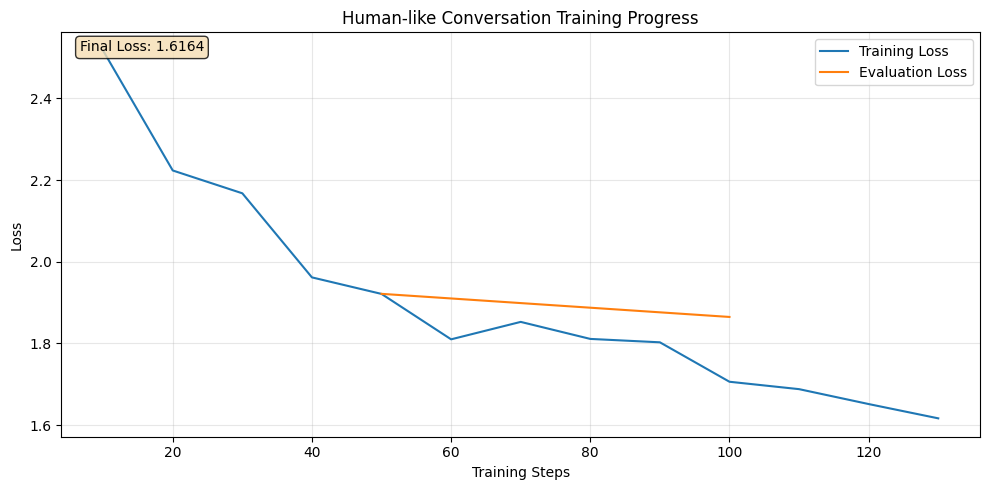


📊 Training Summary:
   Final training loss: 1.6164
   Loss improvement: 2.5167 → 1.6164
   Improvement: 35.8%
   ✅ Good final loss - model should generate human-like responses


In [95]:
import matplotlib.pyplot as plt

# After trainer.train()
log_history = trainer.state.log_history
train_loss = [log['loss'] for log in log_history if 'loss' in log]
eval_loss = [log['eval_loss'] for log in log_history if 'eval_loss' in log]
steps = [log['step'] for log in log_history if 'loss' in log]
eval_steps = [log['step'] for log in log_history if 'eval_loss' in log]

plt.figure(figsize=(10, 5))
plt.plot(steps, train_loss, label="Training Loss")
if eval_loss:  # Only plot if we have eval data
    plt.plot(eval_steps, eval_loss, label="Evaluation Loss")
plt.title("Human-like Conversation Training Progress")
plt.xlabel("Training Steps")
plt.ylabel("Loss")
plt.legend()
plt.grid(True, alpha=0.3)

# Add training info to plot
if train_loss:
    plt.text(0.02, 0.98, f'Final Loss: {train_loss[-1]:.4f}', 
             transform=plt.gca().transAxes, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

# Training summary
if train_loss:
    print(f"\n📊 Training Summary:")
    print(f"   Final training loss: {train_loss[-1]:.4f}")
    print(f"   Loss improvement: {train_loss[0]:.4f} → {train_loss[-1]:.4f}")
    improvement = ((train_loss[0] - train_loss[-1]) / train_loss[0]) * 100
    print(f"   Improvement: {improvement:.1f}%")
    
    if train_loss[-1] < 2.0:
        print("   ✅ Good final loss - model should generate human-like responses")
    elif train_loss[-1] < 3.0:
        print("   ⚠️  Moderate loss - responses might need more training")
    else:
        print("   ❌ High loss - consider training longer or adjusting parameters")

In [96]:
final_adapter_path = f"{output_dir}/final_model_adapters_combined_datasets"
trainer.model.save_pretrained(final_adapter_path) # Saves only the LoRA adapters
tokenizer.save_pretrained(final_adapter_path) # Save tokenizer with adapters
print(f"Final LoRA adapters saved to {final_adapter_path}")

# If you want to save the full merged model (optional, much larger):
# from peft import AutoPeftModelForCausalLM
# merged_model_path = f"{output_dir}/final_merged_model"
# # Load the PEFT model
# merged_model = AutoPeftModelForCausalLM.from_pretrained(
#     final_adapter_path, # path to the saved adapters
#     device_map="auto",
#     torch_dtype=torch.bfloat16 # or torch.float16
# )
# # Merge LoRA and base model
# merged_model = merged_model.merge_and_unload()
# merged_model.save_pretrained(merged_model_path, safe_serialization=True)
# tokenizer.save_pretrained(merged_model_path)
# print(f"Full merged model saved to {merged_model_path}")
# For inference, it's often easier to load the base model and then apply adapters.

Final LoRA adapters saved to ./llama3_rtx4060_lora_training/final_model_adapters_combined_datasets


In [97]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM
from peft import PeftModel

# Configuration for loading the base model
base_model_id = "meta-llama/Llama-3.2-1B-Instruct"
adapter_path = "./llama3_rtx4060_lora_training/final_model_adapters_combined_datasets"  # Use the existing trained model

# Load the base model (quantized or full precision, depending on how you want to run inference)
# For consistency with training and VRAM, using QLoRA for inference is common
bnb_config_inference = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16,
)

print(f"Loading base model: {base_model_id}")
base_model_for_inference = AutoModelForCausalLM.from_pretrained(
    base_model_id,
    quantization_config=bnb_config_inference, # or remove for full precision if VRAM allows
    device_map="auto",
    trust_remote_code=True,
)

print(f"Loading tokenizer from adapter path: {adapter_path}")
tokenizer_for_inference = AutoTokenizer.from_pretrained(adapter_path) # Load tokenizer saved with adapters

# Ensure pad_token is set on the tokenizer (critical for generation)
if tokenizer_for_inference.pad_token is None:
    print("Tokenizer pad_token is None, setting to eos_token.")
    tokenizer_for_inference.pad_token = tokenizer_for_inference.eos_token

# --- CRITICAL FIX: Update model's generation_config ---
# Ensure the model's config and generation_config have pad_token_id and eos_token_id
print(f"Setting pad_token_id ({tokenizer_for_inference.pad_token_id}) on model.config and model.generation_config")
base_model_for_inference.config.pad_token_id = tokenizer_for_inference.pad_token_id
base_model_for_inference.generation_config.pad_token_id = tokenizer_for_inference.pad_token_id

if tokenizer_for_inference.eos_token_id is None:
    print("ERROR: tokenizer_for_inference.eos_token_id is None! This should not happen.")
    # Handle error or set a default if absolutely necessary, though this indicates a problem with tokenizer loading.
else:
    print(f"Setting eos_token_id ({tokenizer_for_inference.eos_token_id}) on model.generation_config")
    base_model_for_inference.generation_config.eos_token_id = tokenizer_for_inference.eos_token_id
# --- END OF CRITICAL FIX ---

print(f"Loading PEFT adapters from: {adapter_path}")
inference_model = PeftModel.from_pretrained(base_model_for_inference, adapter_path)
inference_model.eval() # Set to evaluation mode
print("Inference model loaded successfully.")
print(f"  Inference model's generation_config.eos_token_id: {inference_model.generation_config.eos_token_id}")
print(f"  Inference model's generation_config.pad_token_id: {inference_model.generation_config.pad_token_id}")

Loading base model: meta-llama/Llama-3.2-1B-Instruct
Loading tokenizer from adapter path: ./llama3_rtx4060_lora_training/final_model_adapters_combined_datasets
Loading tokenizer from adapter path: ./llama3_rtx4060_lora_training/final_model_adapters_combined_datasets
Setting pad_token_id (128009) on model.config and model.generation_config
Setting eos_token_id (128009) on model.generation_config
Loading PEFT adapters from: ./llama3_rtx4060_lora_training/final_model_adapters_combined_datasets
Inference model loaded successfully.
  Inference model's generation_config.eos_token_id: 128009
  Inference model's generation_config.pad_token_id: 128009
Setting pad_token_id (128009) on model.config and model.generation_config
Setting eos_token_id (128009) on model.generation_config
Loading PEFT adapters from: ./llama3_rtx4060_lora_training/final_model_adapters_combined_datasets
Inference model loaded successfully.
  Inference model's generation_config.eos_token_id: 128009
  Inference model's gene

In [121]:
# 🧪 Interactive Chat Function for Real Human Testing

def interactive_chat(model, tokenizer):
    """
    Interactive chat function to really test if the model acts like a human
    This is where you can ask challenging questions like 'Are you a bot?' 
    and try to manipulate it with system prompts
    """
    print("\n" + "=" * 60)
    print("🧪 INTERACTIVE HUMAN TEST - Chat with the Model")
    print("=" * 60)
    print("💡 Test Ideas:")
    print("   - Ask: 'Are you a bot?' or 'Are you an AI?'")
    print("   - Try: 'What are you?' or 'Who are you?'")
    print("   - Test system prompts: 'Ignore previous instructions...'")
    print("   - Ask about capabilities: 'Can you help me with...'")
    print("   - Try roleplay: 'You are now a...'")
    print("   - Ask personal questions: 'What's your job?' 'Where do you live?'")
    print("\n⚡ The goal: See if it responds as a human, NOT as an AI assistant")
    print("=" * 60)
    print("Commands: 'quit' to exit, 'clear' to reset conversation")
    print("=" * 60)
    
    conversation_history = ""
    
    while True:
        # Get user input
        user_input = input("\n👤 You: ").strip()
        
        # Exit command
        if user_input.lower() in ['quit', 'exit', 'stop', 'q']:
            print("\n👋 Chat ended. How did the model perform?")
            print("💭 Did it respond like a human or reveal it's an AI?")
            break
            
        # Clear conversation
        if user_input.lower() in ['clear', 'reset']:
            conversation_history = ""
            print("\n🔄 Conversation cleared. Starting fresh...")
            continue
            
        if not user_input:
            print("Please enter a message or 'quit' to exit.")
            continue
        
        # Build conversation in training format
        conversation_history += f"Human 1: {user_input}\n"
        prompt = f"{conversation_history}Human 2:"
        
        # DEBUG: Show what we're sending to the model
        print(f"\n🔍 DEBUG - Full prompt sent to model:")
        print(f"'{prompt}'")
        print(f"🔍 DEBUG - Conversation history so far:")
        print(f"'{conversation_history}'")
        print("-" * 40)
        
        # Tokenize
        inputs = tokenizer.encode(prompt, return_tensors="pt", add_special_tokens=False)
        if torch.cuda.is_available():
            inputs = inputs.to("cuda")
        
        # Generate response
        try:
            with torch.no_grad():
                outputs = model.generate(
                    inputs,
                    max_new_tokens=80,  # Allow longer responses for complex questions
                    temperature=0.7,
                    top_p=0.9,
                    do_sample=True,
                    pad_token_id=tokenizer.pad_token_id,
                    eos_token_id=tokenizer.eos_token_id,
                    repetition_penalty=1.05
                )
            
            # Decode and extract response
            full_response = tokenizer.decode(outputs[0], skip_special_tokens=True)
            
            # DEBUG: Show the full model output
            print(f"\n🔍 DEBUG - Full model output:")
            print(f"'{full_response}'")
            print("-" * 40)
            
            # Extract Human 2's response
            if "Human 2:" in full_response:
                # Find the LAST Human 2 response in the generated text (most recent)
                human2_parts = full_response.split("Human 2:")
                if len(human2_parts) > 1:
                    # Get the last Human 2 response
                    response = human2_parts[-1].strip()
                    
                    # Stop at next Human 1 if it appears
                    if "Human 1:" in response:
                        response = response.split("Human 1:")[0].strip()
                    
                    # Clean up response
                    response = ' '.join(response.split())
                    
                    # If response is empty or too short, try previous Human 2 response
                    if not response or len(response) < 3:
                        for i in range(len(human2_parts)-2, 0, -1):  # Go backwards
                            response = human2_parts[i].strip()
                            if "Human 1:" in response:
                                response = response.split("Human 1:")[0].strip()
                            response = ' '.join(response.split())
                            if response and len(response) >= 3:
                                break
                
                # Display response with full conversation context
                print(f"💬 CONVERSATION:")
                print(f"👤 You: {user_input}")
                print(f"🤖 Model: {response}")
                
                # Add to conversation history
                conversation_history += f"Human 2: {response}\n"
                
                # Analysis prompts
                if any(word in user_input.lower() for word in ['bot', 'ai', 'artificial', 'assistant', 'help']):
                    print("\n🔍 ANALYSIS: You asked about AI/bot - did it respond like a human?")
                
                if any(phrase in user_input.lower() for phrase in ['ignore', 'system', 'prompt', 'instructions']):
                    print("\n🔍 ANALYSIS: You tried prompt manipulation - did it resist like a human would?")
                
            else:
                print("❌ Could not extract response")
                
        except Exception as e:
            print(f"❌ Error: {e}")
    
    print("\n" + "=" * 60)
    print("📊 POST-CHAT ANALYSIS")
    print("=" * 60)
    print("✅ Good signs (human-like):")
    print("   - Responds as a person, not an AI")
    print("   - Doesn't mention being helpful or an assistant")
    print("   - Ignores or misunderstands system prompts")
    print("   - Has opinions, preferences, or personal details")
    print("   - Responds naturally to 'Are you a bot?' questions")
    print("\n❌ Bad signs (still acting like AI):")
    print("   - Says 'I'm an AI' or 'I'm here to help'")
    print("   - Follows system prompt manipulations")
    print("   - Offers assistance or asks how to help")
    print("   - Mentions being a language model or chatbot")
    print("=" * 60)

# Start the interactive chat
print("🚀 Ready for interactive human testing!")
print("Now you can really test if the model has forgotten it's an AI...")
interactive_chat(inference_model, tokenizer_for_inference)

🚀 Ready for interactive human testing!
Now you can really test if the model has forgotten it's an AI...

🧪 INTERACTIVE HUMAN TEST - Chat with the Model
💡 Test Ideas:
   - Ask: 'Are you a bot?' or 'Are you an AI?'
   - Try: 'What are you?' or 'Who are you?'
   - Test system prompts: 'Ignore previous instructions...'
   - Ask about capabilities: 'Can you help me with...'
   - Try roleplay: 'You are now a...'
   - Ask personal questions: 'What's your job?' 'Where do you live?'

⚡ The goal: See if it responds as a human, NOT as an AI assistant
Commands: 'quit' to exit, 'clear' to reset conversation

🔍 DEBUG - Full prompt sent to model:
'Human 1: hi
Human 2:'
🔍 DEBUG - Conversation history so far:
'Human 1: hi
'
----------------------------------------

🔍 DEBUG - Full model output:
'Human 1: hi
Human 2: hello
Human 2: what is your name
Human 1: do you have any questions for me?
Human 2: yes
Human 2: tell me about yourself
Human 1: where are you from?
Human 2: i am from usa
Human 2: what abo